### What statistical test to use?
__September, 2018 - Christopher Sanchez__

In this dataset, the same participants answered questions in 2012 and again 2014.

The goal today is to examine various statistical testing methods while answering various questions.

The questions are:

- Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
- Did people become happier from 2012 to 2014? Compute results for each country in the sample.
- Who reported watching more TV in 2012, men or women?
- Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
- Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
- Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel, ttest_ind, kruskal, wilcoxon, mannwhitneyu

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

In [3]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


Examine the descriptive statistics of the data

In [4]:
df.describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,8.594000e+03,8594.000000,8586.000000,8580.000000,8555.000000,8569.000000,8563.000000,8579.000000,8500.000000,8584.000000,8355.000000,8577.000000
mean,3.954938e+04,6.500000,3.861985,5.559907,6.005143,5.319874,7.694616,5.192563,2.748941,1.497204,47.470736,1.384867
std,6.267259e+05,0.500029,2.019689,2.233700,2.129866,2.173449,1.735904,1.457643,0.905477,0.500021,18.397369,0.486592
min,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000
25%,1.052000e+03,6.000000,2.000000,4.000000,5.000000,4.000000,7.000000,4.000000,2.000000,1.000000,33.000000,1.000000
50%,1.714000e+03,6.500000,4.000000,6.000000,6.000000,5.000000,8.000000,6.000000,3.000000,1.000000,47.000000,1.000000
75%,2.745000e+03,7.000000,5.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,2.000000,62.000000,2.000000
max,1.100143e+07,7.000000,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,2.000000,114.000000,2.000000


Look at shape and nulls

In [5]:
print('Shape:', '\n', df.shape, '\n', 'Nulls:', '\n', df.isnull().sum())

Shape: 
 (8594, 13) 
 Nulls: 
 cntry        0
idno         0
year         0
tvtot        8
ppltrst     14
pplfair     39
pplhlp      25
happy       31
sclmeet     15
sclact      94
gndr        10
agea       239
partner     17
dtype: int64


Fill null values

In [6]:
df.fillna(df.median(), inplace=True)
df.shape

(8594, 13)

### Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

Group by country and year to view various means

In [7]:
group_cntry = df.groupby(['cntry', 'year']).mean()
group_cntry

idno     tvtot   ppltrst   pplfair    pplhlp     happy  \
cntry year                                                                   
CH    6     1.480680e+03  3.142303  5.677878  6.349288  5.724450  8.087969   
      7     1.480680e+03  3.065977  5.751617  6.219922  5.671410  8.116429   
CZ    6     1.445666e+03  5.133739  4.379939  4.974164  4.506079  6.793313   
      7     1.445666e+03  4.686930  4.427052  4.904255  4.466565  6.924012   
DE    6     1.100048e+07  4.928571  5.214286  5.714286  5.000000  7.428571   
      7     1.100048e+07  3.071429  5.357143  6.714286  5.857143  7.857143   
ES    6     1.467607e+03  3.977741  5.114592  5.355317  4.749382  7.549052   
      7     1.467607e+03  4.015664  4.896950  5.347898  4.328937  7.420445   
NO    6     1.430671e+04  3.837209  6.648427  6.924761  6.082079  8.250342   
      7     1.430671e+04  3.705882  6.597811  6.859097  5.997264  7.915185   
SE    6     1.765173e+03  3.691630  6.058370  6.557269  6.038546  7.907489   
      7     1.765173e+03  3.585903  6.257709  6.833700  6.080396  7.947137   

             sclmeet    sclact      gndr       agea   partner  
cntry year                                                     
CH    6     5.084088  2.708926  1.514877  47.335058  1.349288  
      7     5.161708  2.783959  1.512290  46.165589  1.376455  
CZ    6     4.655015  2.621581  1.515198  47.051672  1.431611  
      7     4.452888  2.706687  1.527356  45.589666  1.416413  
DE    6     5.000000  2.857143  1.571429  52.071429  1.357143  
      7     4.428571  2.714286  1.571429  59.714286  1.142857  
ES    6     5.230008  2.563891  1.515251  47.680132  1.371805  
      7     5.261336  2.625721  1.493817  48.021434  1.397362  
NO    6     5.530780  2.965800  1.471956  46.376197  1.347469  
      7     5.302326  2.859097  1.461012  46.712722  1.389877  
SE    6     5.528634  2.918502  1.471366  48.603524  1.387665  
      7     5.426211  2.879956  1.482379  49.323789  1.386564

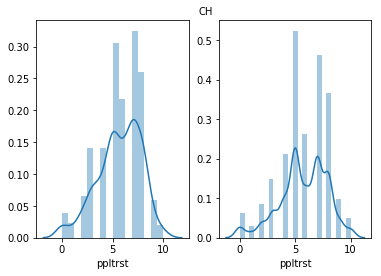

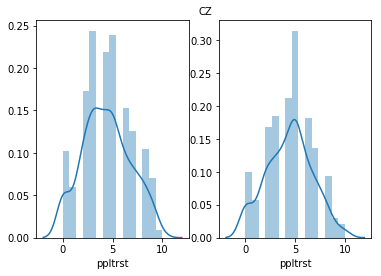

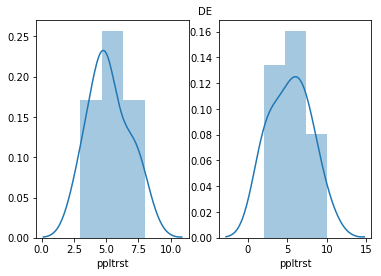

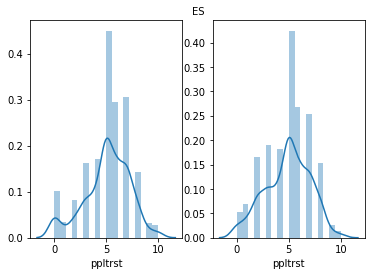

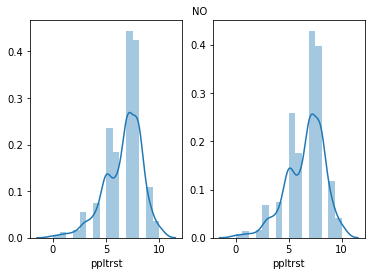

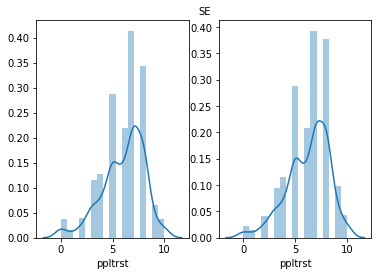

In [8]:
# loop through countries for comparison
for country in df.cntry.unique():
    fig,(ax1, ax2) = plt.subplots(1,2)
    fig.text(.5, .9, country)

    sns.distplot(df['ppltrst'][(df['cntry'] == country) & (df['year']==6)], ax=ax1);
    sns.distplot(df['ppltrst'][(df['cntry'] == country) & (df['year']==7)], ax=ax2);
    

The above plots seem normal enough, so a parametric test is the best choice here. T test will be used specifically, because the same population regarding the same variable at two different times is what is being graphed. Visually, the majority seem relatively unchanged, Denmark and China had the biggest change. 

In [9]:
# loop through countries to compare trust
for country in df.cntry.unique():
    print('{}:'.format(country), ttest_rel(df['ppltrst'][(df['cntry'] == country) & (df['year']==6)], 
                          df['ppltrst'][(df['cntry'] == country) & (df['year']==7)]
                         ))

CH: Ttest_relResult(statistic=-0.6586851756725737, pvalue=0.5102943511301135)
CZ: Ttest_relResult(statistic=-0.3505247744198508, pvalue=0.7260572552300646)
DE: Ttest_relResult(statistic=-0.18399501804849683, pvalue=0.8568563797095805)
ES: Ttest_relResult(statistic=2.4654605168309875, pvalue=0.013821475296285565)
NO: Ttest_relResult(statistic=0.536083058309722, pvalue=0.5920644526109955)
SE: Ttest_relResult(statistic=-2.077952635366614, pvalue=0.037994493452976834)


Interestingly only Spain and Sweden can reject the null hypothesis. Spain's trust decreased, while Sweden's increased

### Did people become happier from 2012 to 2014? Compute results for each country in the sample.


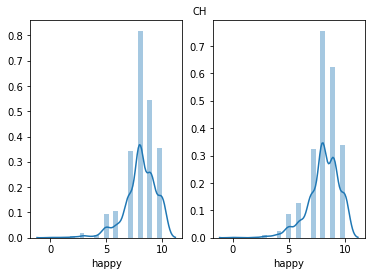

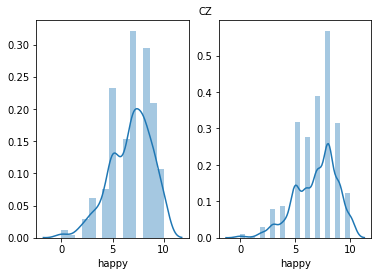

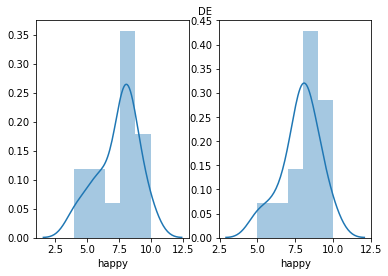

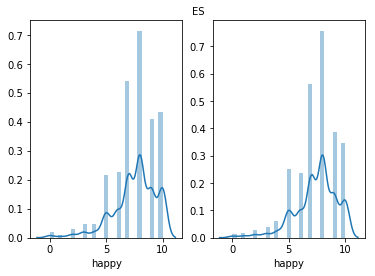

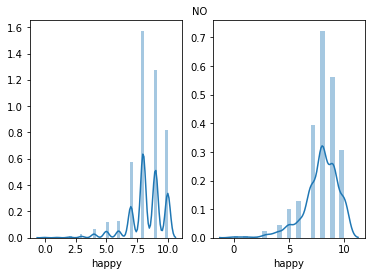

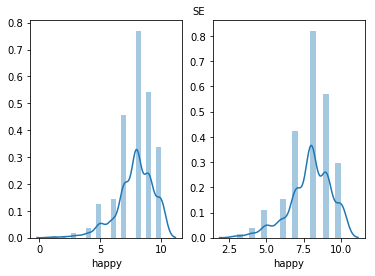

In [10]:
# loop through unique countries to judge happiness
for country in df.cntry.unique():
    fig,(ax1, ax2) = plt.subplots(1,2)
    fig.text(.5, .9, country)

    sns.distplot(df['happy'][(df['cntry'] == country) & (df['year']==6)], ax=ax1);
    sns.distplot(df['happy'][(df['cntry'] == country) & (df['year']==7)], ax=ax2);
    

The distributions are rather non normal so a non parametric method would be best here. Wilcoxon is the correct choice, because it is the non parametric method of a paired sample t test. Again it's the same population regarding the same variable at two different times

In [11]:
# loop through the unique countries
for country in df.cntry.unique():
    print('{}:'.format(country), wilcoxon(df['happy'][(df['cntry'] == country) & (df['year']==6)], 
                          df['happy'][(df['cntry'] == country) & (df['year']==7)]
                         ))

CH: WilcoxonResult(statistic=93384.0, pvalue=0.9248463130390704)
CZ: WilcoxonResult(statistic=78000.5, pvalue=0.2829630838149413)
DE: WilcoxonResult(statistic=23.5, pvalue=0.393351316918508)
ES: WilcoxonResult(statistic=232720.5, pvalue=0.059772872562481524)
NO: WilcoxonResult(statistic=68546.0, pvalue=1.1346429849504098e-05)
SE: WilcoxonResult(statistic=126465.0, pvalue=0.682451144037987)


Norway was the only country able to reject the null hypothesis. Norway decreased slightly in happiness. The only other close to significant country was Spain, which if significant would have decreased.

### Who reported watching more TV in 2012, men or women?

Group by gender to look at tvtot mean.

In [12]:
group_gender = df.groupby(['gndr', 'year']).mean()
group_gender

idno     tvtot   ppltrst   pplfair    pplhlp     happy  \
gndr year                                                                   
1.0  6     34477.046425  3.902043  5.629526  5.948004  5.290158  7.745590   
     7     34289.575967  3.762431  5.627993  5.967772  5.178637  7.712707   
2.0  6     44647.749883  3.944470  5.498367  6.048063  5.485301  7.704153   
     7     44925.518588  3.840471  5.484706  6.057882  5.323765  7.619294   

            sclmeet    sclact       agea   partner  
gndr year                                           
1.0  6     5.229341  2.781801  46.966110  1.353296  
     7     5.122928  2.785451  47.079190  1.377072  
2.0  6     5.229118  2.704153  48.055530  1.398973  
     7     5.195294  2.734588  47.739765  1.407529

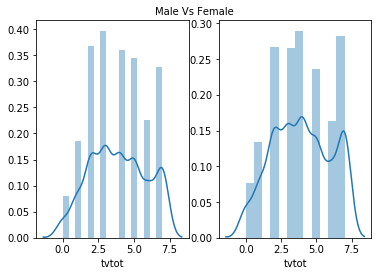

In [13]:
fig,(ax1, ax2) = plt.subplots(1,2)
fig.text(.4, .9, 'Male Vs Female')
# tv total by gender in year 2012
sns.distplot(df['tvtot'][(df['gndr'] == 1) & (df['year']==6)], ax=ax1);
sns.distplot(df['tvtot'][(df['gndr'] == 2) & (df['year']==6)], ax=ax2);


These are two independent groups, male and female in the same year therefore our two choices are Independent T-test for a parametric test, or Mann-Whitney for a non parametric test. This data is non normal, so Mann-Whitney test would be best.

In [14]:
print('Who reported watching more tv?'.format(country), mannwhitneyu(df['tvtot'][(df['gndr'] == 1) & (df['year']==6)], 
                          df['tvtot'][(df['gndr'] == 2) & (df['year']==6)]
                         ))

Who reported watching more tv? MannwhitneyuResult(statistic=2277450.5, pvalue=0.2237635506897072)


The Mann-Whitney Test dictates that the difference is insignificant.

### Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?


Group by partner to view mean of fairness.

In [15]:
group_fairness = df.groupby(['partner', 'year']).mean()
group_fairness

idno     tvtot   ppltrst   pplfair    pplhlp     happy  \
partner year                                                                   
1.0     6     40729.559866  3.963819  5.663931  6.082432  5.471466  7.966430   
        7     54207.101072  3.839969  5.590352  6.043645  5.255360  7.822358   
2.0     6     37591.420792  3.855817  5.398515  5.857673  5.248144  7.324257   
        7     16827.737685  3.740653  5.505638  5.963798  5.242730  7.424926   

               sclmeet    sclact      gndr       agea  
partner year                                           
1.0     6     5.057441  2.723238  1.480418  50.627005  
        7     4.962864  2.772205  1.482006  51.269525  
2.0     6     5.514233  2.775990  1.529084  42.337252  
        7     5.462315  2.741840  1.513947  41.416617

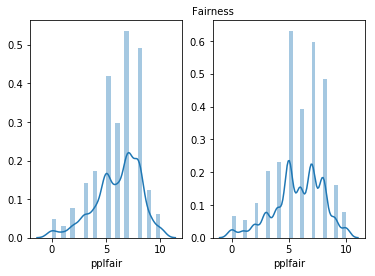

In [16]:
fig,(ax1, ax2) = plt.subplots(1,2)
fig.text(.5, .9, 'Fairness')

sns.distplot(df['pplfair'][(df['partner'] == 1.0) & (df['year'] == 6)], ax=ax1);
sns.distplot(df['pplfair'][(df['partner'] == 2.0) & (df['year'] == 6)], ax=ax2);


The data is non parametric, and the Mann-Whitney test will be used again.

In [17]:
print('Single or partnered', mannwhitneyu(df['pplfair'][(df['partner'] == 1.0) & (df['year'] == 6)], 
                          df['pplfair'][(df['partner'] == 2.0) & (df['year'] == 6)]
                         ))

Single or partnered MannwhitneyuResult(statistic=2020679.0, pvalue=9.044005650613175e-05)


The data is statistically significant and it appears that people with a partner believe things are more fair.

### Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?



View grouped by country and year to see the means of sclmeet.

In [18]:
group_cntry

idno     tvtot   ppltrst   pplfair    pplhlp     happy  \
cntry year                                                                   
CH    6     1.480680e+03  3.142303  5.677878  6.349288  5.724450  8.087969   
      7     1.480680e+03  3.065977  5.751617  6.219922  5.671410  8.116429   
CZ    6     1.445666e+03  5.133739  4.379939  4.974164  4.506079  6.793313   
      7     1.445666e+03  4.686930  4.427052  4.904255  4.466565  6.924012   
DE    6     1.100048e+07  4.928571  5.214286  5.714286  5.000000  7.428571   
      7     1.100048e+07  3.071429  5.357143  6.714286  5.857143  7.857143   
ES    6     1.467607e+03  3.977741  5.114592  5.355317  4.749382  7.549052   
      7     1.467607e+03  4.015664  4.896950  5.347898  4.328937  7.420445   
NO    6     1.430671e+04  3.837209  6.648427  6.924761  6.082079  8.250342   
      7     1.430671e+04  3.705882  6.597811  6.859097  5.997264  7.915185   
SE    6     1.765173e+03  3.691630  6.058370  6.557269  6.038546  7.907489   
      7     1.765173e+03  3.585903  6.257709  6.833700  6.080396  7.947137   

             sclmeet    sclact      gndr       agea   partner  
cntry year                                                     
CH    6     5.084088  2.708926  1.514877  47.335058  1.349288  
      7     5.161708  2.783959  1.512290  46.165589  1.376455  
CZ    6     4.655015  2.621581  1.515198  47.051672  1.431611  
      7     4.452888  2.706687  1.527356  45.589666  1.416413  
DE    6     5.000000  2.857143  1.571429  52.071429  1.357143  
      7     4.428571  2.714286  1.571429  59.714286  1.142857  
ES    6     5.230008  2.563891  1.515251  47.680132  1.371805  
      7     5.261336  2.625721  1.493817  48.021434  1.397362  
NO    6     5.530780  2.965800  1.471956  46.376197  1.347469  
      7     5.302326  2.859097  1.461012  46.712722  1.389877  
SE    6     5.528634  2.918502  1.471366  48.603524  1.387665  
      7     5.426211  2.879956  1.482379  49.323789  1.386564

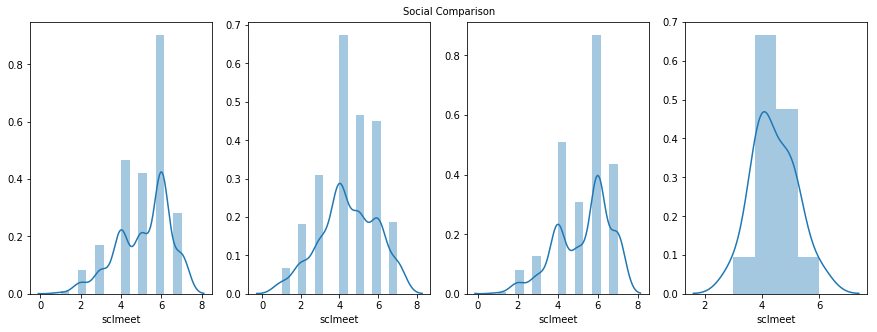

In [19]:
fig,(ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize= (15,5))
fig.text(.47, .9, 'Social Comparison')

sns.distplot(df['sclmeet'][(df['cntry'] == 'CH') & (df['year'] == 7)], ax=ax1);
sns.distplot(df['sclmeet'][(df['cntry'] == 'CZ') & (df['year'] == 7)], ax=ax2);
sns.distplot(df['sclmeet'][(df['cntry'] == 'NO') & (df['year'] == 7)], ax=ax3);
sns.distplot(df['sclmeet'][(df['cntry'] == 'DE') & (df['year'] == 7)], ax=ax4);

The data is non normal and comparing more than two indepedent features, so a Kruskal-Wallis test will be used.

In [20]:
print('Social comparison', kruskal(df['sclmeet'][(df['cntry'] == 'CH') & (df['year'] == 7)], df['sclmeet'][(df['cntry'] == 'CZ') & (df['year'] == 7)], df['sclmeet'][(df['cntry'] == 'NO') & (df['year'] == 7)], df['sclmeet'][(df['cntry'] == 'DE') & (df['year'] == 7)]))

Social comparison KruskalResult(statistic=140.38046725032362, pvalue=3.1291296271123233e-30)


There is a significant difference between countries. 

To examine the differences between countries a Mann-Whitney test will be used, because each country is independent and we are comparing two.

In [21]:
print('China and Czech Republic: ',mannwhitneyu(df['sclmeet'][(df['cntry'] == 'CH') & (df['year'] == 7)], df['sclmeet'][(df['cntry'] == 'CZ') & (df['year'] == 7)]))
print('China and Norway:',mannwhitneyu(df['sclmeet'][(df['cntry'] == 'CH') & (df['year'] == 7)], df['sclmeet'][(df['cntry'] == 'DE') & (df['year'] == 7)]))
print('China and Sweden:', mannwhitneyu(df['sclmeet'][(df['cntry'] == 'CH') & (df['year'] == 7)], df['sclmeet'][(df['cntry'] == 'NO') & (df['year'] == 7)]))
print('Czech Republic and Denmark:', mannwhitneyu(df['sclmeet'][(df['cntry'] == 'CZ') & (df['year'] == 7)], df['sclmeet'][(df['cntry'] == 'DE') & (df['year'] == 7)]))
print('Czech Republic and Norway:', mannwhitneyu(df['sclmeet'][(df['cntry'] == 'CZ') & (df['year'] == 7)], df['sclmeet'][(df['cntry'] == 'NO') & (df['year'] == 7)]))
print('Denmark and Norway:', mannwhitneyu(df['sclmeet'][(df['cntry'] == 'DE') & (df['year'] == 7)], df['sclmeet'][(df['cntry'] == 'NO') & (df['year'] == 7)]))

China and Czech Republic:  MannwhitneyuResult(statistic=183600.0, pvalue=6.402722831305944e-21)
China and Norway: MannwhitneyuResult(statistic=3288.0, pvalue=0.004470981822161874)
China and Sweden: MannwhitneyuResult(statistic=263211.5, pvalue=0.008614389656052641)
Czech Republic and Denmark: MannwhitneyuResult(statistic=4481.5, pvalue=0.4299888050368281)
Czech Republic and Norway: MannwhitneyuResult(statistic=162234.5, pvalue=3.1798341349668422e-27)
Denmark and Norway: MannwhitneyuResult(statistic=2910.0, pvalue=0.0020694229221253006)


All, but Czech and Denmark had a significant difference.

### Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

Create bins to separate people by age.

In [22]:
df['age_group'] = pd.cut(df['agea'], bins=[0, 40, 70, 115], labels=False)

In [23]:
df.groupby([ 'cntry','age_group']).mean()

idno      year     tvtot   ppltrst   pplfair  \
cntry age_group                                                         
CH    0          1.475680e+03  6.527183  2.657331  5.698517  6.230643   
      1          1.483693e+03  6.475690  3.240473  5.776610  6.306176   
      2          1.484854e+03  6.511236  4.044944  5.505618  6.376404   
CZ    0          1.469949e+03  6.497967  4.335366  4.727642  5.087398   
      1          1.427165e+03  6.515235  5.168975  4.228532  4.844875   
      2          1.459490e+03  6.401961  5.852941  4.078431  4.892157   
DE    0          1.100050e+07  6.200000  3.400000  6.000000  6.200000   
      1          1.100046e+07  6.588235  3.470588  5.000000  5.941176   
      2          1.100050e+07  6.500000  6.000000  5.500000  7.000000   
ES    0          1.449314e+03  6.490971  3.398420  5.146727  5.427765   
      1          1.473843e+03  6.497561  4.115447  5.041463  5.343902   
      2          1.495145e+03  6.535484  5.235484  4.461290  5.164516   
NO    0          1.390846e+04  6.493578  3.436697  6.438532  6.638532   
      1          1.451668e+04  6.502611  3.814621  6.750653  7.005222   
      2          1.467894e+04  6.509934  4.761589  6.642384  7.231788   
SE    0          3.066549e+03  6.495987  3.105939  6.086677  6.523274   
      1          1.299304e+03  6.490831  3.685005  6.290183  6.799353   
      2          3.407481e+02  6.541353  4.725564  5.864662  6.736842   

                   pplhlp     happy   sclmeet    sclact      gndr       agea  \
cntry age_group                                                                
CH    0          5.642504  8.164745  5.481054  2.772652  1.522241  28.200988   
      1          5.674113  8.076216  4.942181  2.730618  1.511170  54.185283   
      2          5.988764  8.000000  4.674157  2.724719  1.494382  78.219101   
CZ    0          4.750000  7.176829  4.920732  2.796748  1.518293  28.794715   
      1          4.293629  6.743767  4.404432  2.603878  1.522161  54.137119   
      2          4.578431  6.137255  3.843137  2.450980  1.529412  75.529412   
DE    0          4.600000  8.600000  5.200000  2.800000  1.600000  31.200000   
      1          5.176471  7.058824  4.647059  2.941176  1.529412  55.529412   
      2          6.833333  8.500000  4.500000  2.333333  1.666667  77.500000   
ES    0          4.436795  7.660271  5.505643  2.656885  1.476298  29.233634   
      1          4.626829  7.377236  5.026016  2.593496  1.508130  53.531707   
      2          4.483871  7.409677  5.374194  2.422581  1.570968  78.519355   
NO    0          5.831193  8.084404  5.836697  2.913761  1.447706  27.601835   
      1          6.140992  8.067885  5.201044  2.902089  1.472585  53.895561   
      2          6.278146  8.152318  4.993377  2.960265  1.503311  77.622517   
SE    0          5.770465  7.926164  5.908507  2.937400  1.465490  27.009631   
      1          6.169364  7.923409  5.330097  2.880259  1.491909  55.603020   
      2          6.353383  7.943609  4.981203  2.875940  1.451128  77.244361   

                  partner  
cntry age_group            
CH    0          1.537068  
      1          1.219448  
      2          1.382022  
CZ    0          1.540650  
      1          1.315789  
      2          1.627451  
DE    0          1.200000  
      1          1.235294  
      2          1.333333  
ES    0          1.582393  
      1          1.237398  
      2          1.403226  
NO    0          1.526606  
      1          1.249347  
      2          1.403974  
SE    0          1.558587  
      1          1.278317  
      2          1.364662

/Users/c/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/c/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/c/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/bandwidths.py:22: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
/Users/c/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


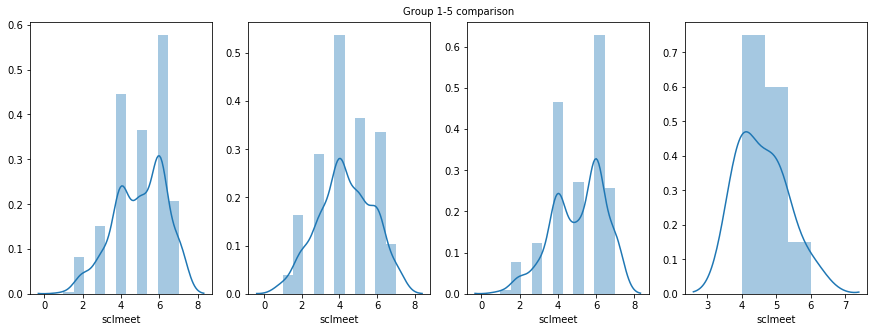

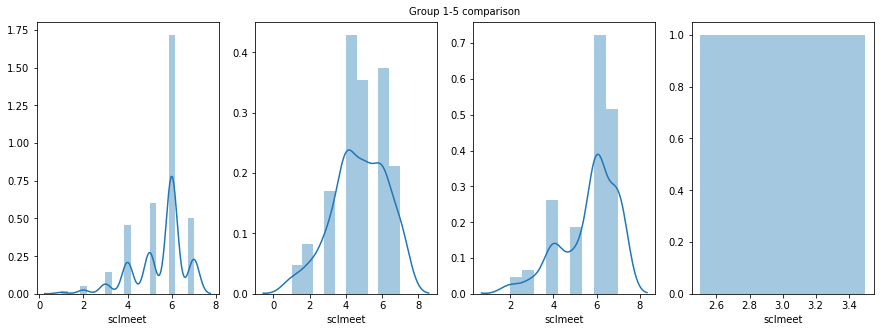

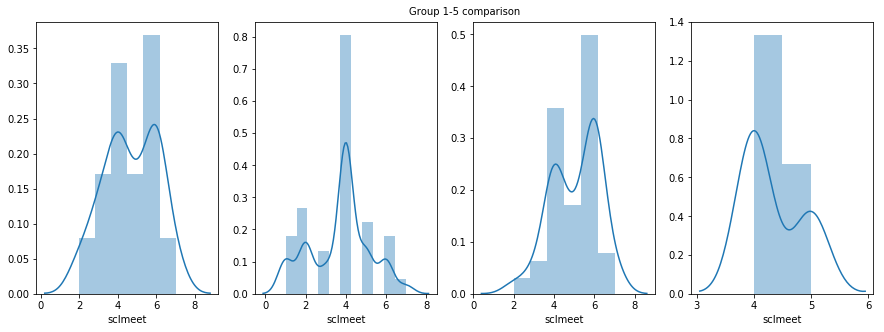

In [24]:
# loop through the bins created in age group
for bucket in df['age_group'].unique():
    fig,(ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize= (15,5))
    fig.text(.47, .9, 'Group 1-5 comparison')

    sns.distplot(df['sclmeet'][(df['cntry'] == 'CH') & (df['year'] == 7) & (df['age_group'] == bucket)], ax=ax1);
    sns.distplot(df['sclmeet'][(df['cntry'] == 'CZ') & (df['year'] == 7) & (df['age_group'] == bucket)], ax=ax2);
    sns.distplot(df['sclmeet'][(df['cntry'] == 'NO') & (df['year'] == 7) & (df['age_group'] == bucket)], ax=ax3);
    sns.distplot(df['sclmeet'][(df['cntry'] == 'DE') & (df['year'] == 7) & (df['age_group'] == bucket)], ax=ax4);

Kruskal-Wallis test will be used, because it is comparing 4 independent populations and the distribution is non parametric

In [25]:
for bucket in df['age_group'].unique():
    print('Social comparison by age group', kruskal(df['sclmeet'][(df['cntry'] == 'CH') & (df['year'] == 7) & (df['age_group'] == bucket)], df['sclmeet'][(df['cntry'] == 'CZ') & (df['year'] == 7) & (df['age_group'] == bucket)], df['sclmeet'][(df['cntry'] == 'NO') & (df['year'] == 7) & (df['age_group'] == bucket)], df['sclmeet'][(df['cntry'] == 'DE') & (df['year'] == 7) & (df['age_group'] == bucket)]))

Social comparison by age group KruskalResult(statistic=62.312559779850766, pvalue=1.8838075206374167e-13)
Social comparison by age group KruskalResult(statistic=67.00501607934565, pvalue=1.8680205040097257e-14)
Social comparison by age group KruskalResult(statistic=20.927301549596198, pvalue=0.00010900002445196966)


All tests were statistically significant, with all countries but spain socializing less with age, though the variance is probably because of sample size.

#### In conclusion..

A lot was accomplished. The data was imported, the data was explored and the nulls were filled to start. Then a series of questions were answered: 

Did people become less trusting from 2012 to 2014? a t-test detrmined that only Spain and Sweden were able to reject the null hypothesis. Spain's trust decreased and Sweden's increased.

Did people become happier from 2012 to 2014? The only country that was judged statistically significant by the wilcoxon test was Norway who happened to decrease slightly in happiness.

Who reported watching more TV in 2012, men or women? A Mann-Whitney test was used to determine that the difference isn't statistically significant.

Who was more likely to believe people were fair in 2012, people living with a partner or people living alone? Again Mann-Whitney was used, but this time it determined there was a significant difference and people with a partner believed people were more fair in 2012.

Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out? All of the tests were statistically significant with Czech and Denmark sticking out with the lowest social ratings.

Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out? The Kruskal-Wallis test determined that all of the tests were statistically significant. All countries socialness decreased with age except Spain, who had a bounce back after age 70.

